**RNN Model**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
15/15 [==============================] - 2s 36ms/step - loss: 0.1716 - val_loss: 0.1603
Epoch 2/50
15/15 [==============================] - 0s 14ms/step - loss: 0.1421 - val_loss: 0.1341
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 0.1210 - val_loss: 0.1165
Epoch 4/50
15/15 [==============================] - 0s 30ms/step - loss: 0.1069 - val_loss: 0.1054
Epoch 5/50
15/15 [==============================] - 0s 25ms/step - loss: 0.0991 - val_loss: 0.0983
Epoch 6/50
15/15 [==============================] - 0s 25ms/step - loss: 0.0933 - val_loss: 0.0939
Epoch 7/50
15/15 [==============================] - 0s 28ms/step - loss: 0.0897 - val_loss: 0.0902
Epoch 8/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0865 - val_loss: 0.0873
Epoch 9/50
15/15 [==============================] - 0s 28ms/step - loss: 0.0838

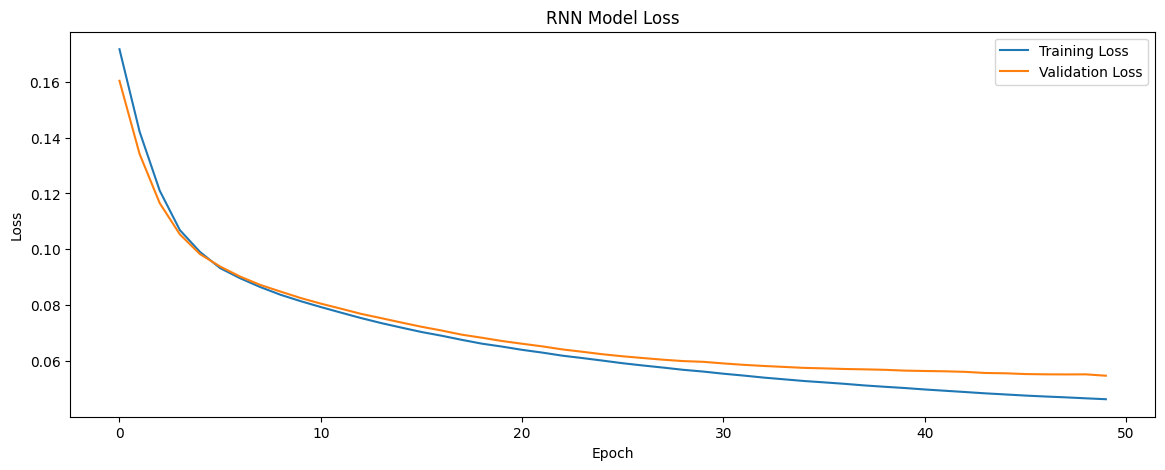

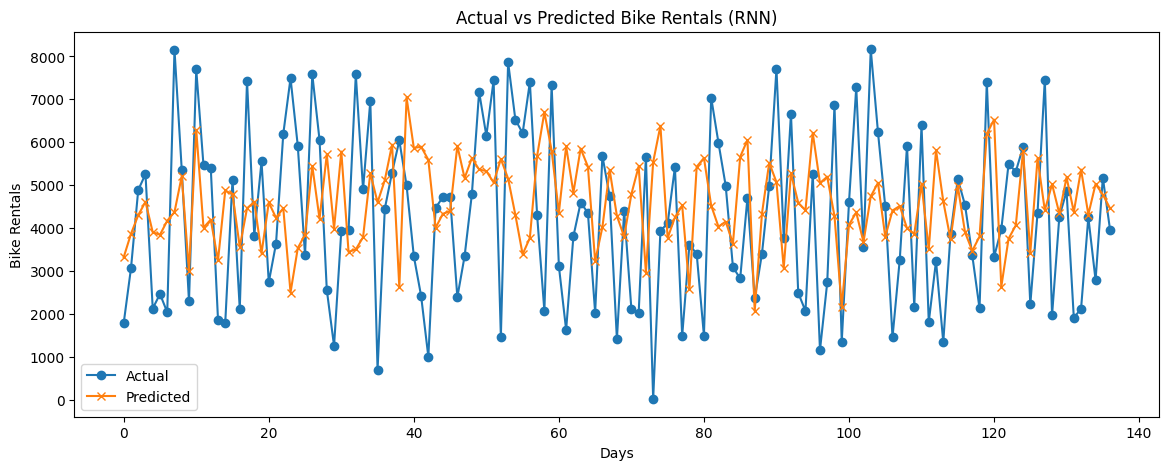

In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/day.csv'
data = pd.read_csv(file_path)

# Select all relevant features to include in the model
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Separate the already normalized features
normalized_features = ['temp', 'atemp', 'hum', 'windspeed']
non_normalized_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_feature = ['cnt']

# Scale the non-normalized features
scaler_features = MinMaxScaler()
data[non_normalized_features] = scaler_features.fit_transform(data[non_normalized_features])

# Scale the target variable separately
scaler_target = MinMaxScaler()
data[target_feature] = scaler_target.fit_transform(data[target_feature])

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(data[features + target_feature], test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Function to create sequences
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = create_sequences(train_data.values, time_steps)
X_val, y_val = create_sequences(val_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
rnn_model.add(Dense(1))

# Compile the model with Adam optimizer
custom_learning_rate = 0.0001  # Specify your desired learning rate here
optimizer = Adam(learning_rate=custom_learning_rate)

rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the RNN model and capture the history
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the RNN model
rnn_predictions = rnn_model.predict(X_test)
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
# rnn_r2 = r2_score(y_test, rnn_predictions)

print(f'RNN Mean Squared Error: {rnn_mse}')
print(f'RNN Mean Absolute Error: {rnn_mae}')
# print(f'RNN R-squared: {rnn_r2}')

# Inverse transform the scaled predictions and actual values to original scale
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))
rnn_predictions_original = scaler_target.inverse_transform(rnn_predictions)

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the results with original values
plt.figure(figsize=(14, 5))
plt.plot(y_test_original, label='Actual', linestyle='-', marker='o')
plt.plot(rnn_predictions_original, label='Predicted', linestyle='-', marker='x')
plt.title('Actual vs Predicted Bike Rentals (RNN)')
plt.xlabel('Days')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()

**LSTM Model**

Epoch 1/50
15/15 [==============================] - 3s 28ms/step - loss: 0.2303 - val_loss: 0.1901
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 0.1773 - val_loss: 0.1427
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.1354 - val_loss: 0.1049
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1022 - val_loss: 0.0768
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0796 - val_loss: 0.0583
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0654 - val_loss: 0.0485
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0587 - val_loss: 0.0448
Epoch 8/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0569 - val_loss: 0.0441
Epoch 9/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0565 - val_loss: 0.0439
Epoch 10/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0563 - val_loss: 0.0438
Epoch 11/5

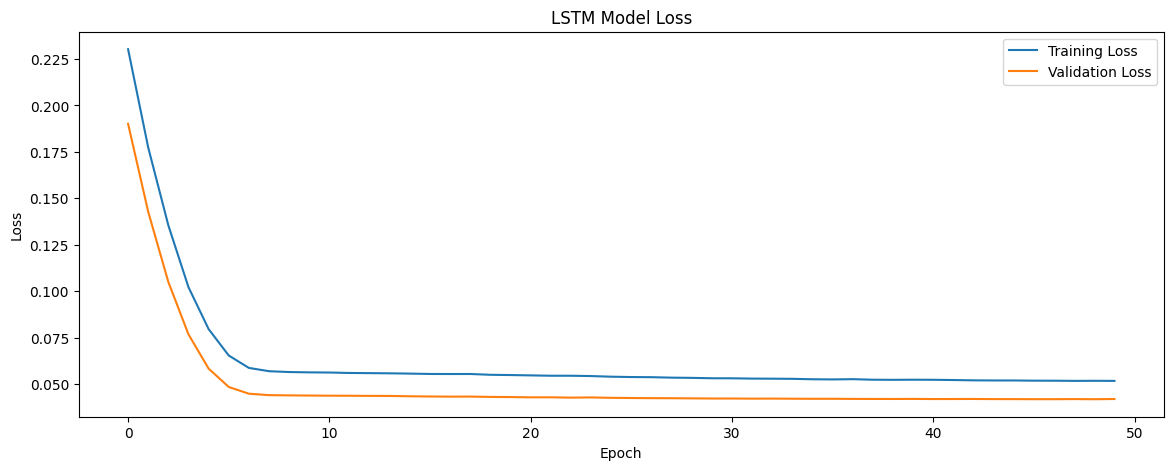

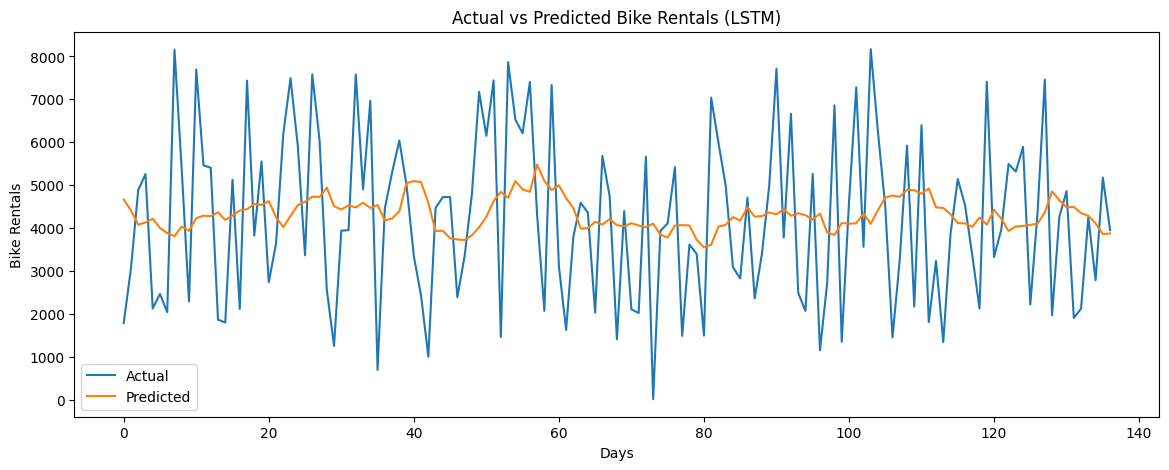

In [24]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/day.csv'
data = pd.read_csv(file_path)

# Select all relevant features to include in the model
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Separate the already normalized features
normalized_features = ['temp', 'atemp', 'hum', 'windspeed']
non_normalized_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_feature = ['cnt']

# Scale the non-normalized features
scaler_features = MinMaxScaler()
data[non_normalized_features] = scaler_features.fit_transform(data[non_normalized_features])

# Scale the target variable separately
scaler_target = MinMaxScaler()
data[target_feature] = scaler_target.fit_transform(data[target_feature])

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(data[features + target_feature], test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Function to create sequences
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = create_sequences(train_data.values, time_steps)
X_val, y_val = create_sequences(val_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
lstm_model.add(Dense(1))

# Compile the model with Adam optimizer
custom_learning_rate = 0.0001  # Specify your desired learning rate here
optimizer = Adam(learning_rate=custom_learning_rate)

lstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the LSTM model and capture the history
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
# lstm_r2 = r2_score(y_test, lstm_predictions)

print(f'LSTM Mean Squared Error: {lstm_mse}')
print(f'LSTM Mean Absolute Error: {lstm_mae}')
# print(f'LSTM R-squared: {lstm_r2}')

# Inverse transform the scaled predictions and actual values to original scale
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_original = scaler_target.inverse_transform(lstm_predictions)

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the results with original values
plt.figure(figsize=(14, 5))
plt.plot(y_test_original, label='Actual')
plt.plot(lstm_predictions_original, label='Predicted')
plt.title('Actual vs Predicted Bike Rentals (LSTM)')
plt.xlabel('Days')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()


**GRU Model**

Epoch 1/50
15/15 [==============================] - 3s 40ms/step - loss: 0.1132 - val_loss: 0.0834
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0880 - val_loss: 0.0629
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0717 - val_loss: 0.0508
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0631 - val_loss: 0.0456
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0596 - val_loss: 0.0438
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.0587 - val_loss: 0.0434
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0582 - val_loss: 0.0432
Epoch 8/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0578 - val_loss: 0.0430
Epoch 9/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0575 - val_loss: 0.0428
Epoch 10/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0571 - val_loss: 0.0426
Epoch 11/50
15

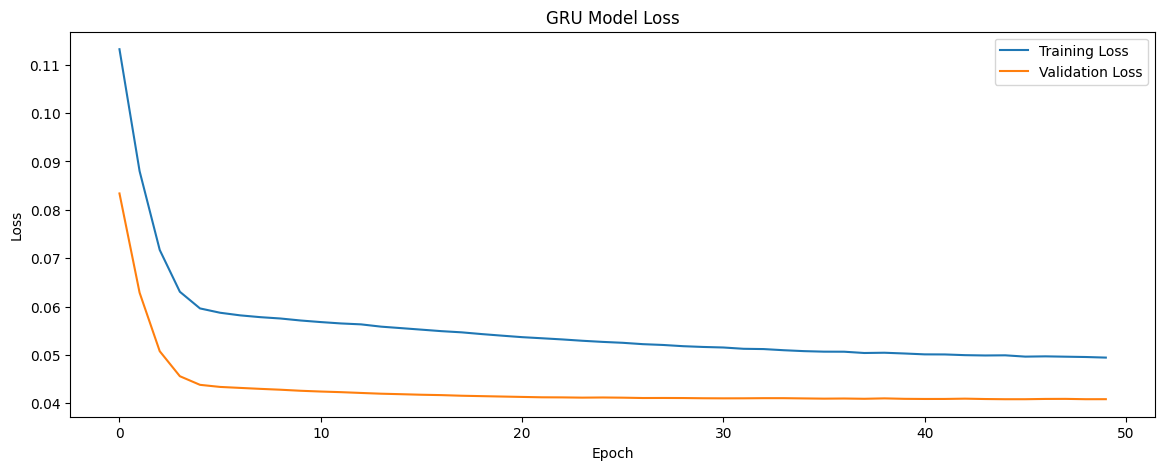

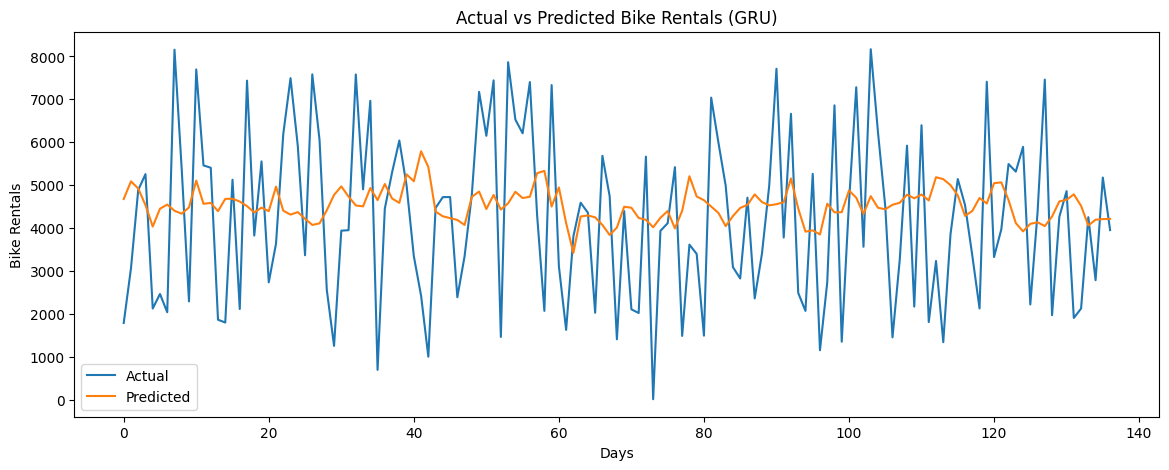

In [25]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/day.csv'
data = pd.read_csv(file_path)

# Select all relevant features to include in the model
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Separate the already normalized features
normalized_features = ['temp', 'atemp', 'hum', 'windspeed']
non_normalized_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target_feature = ['cnt']

# Scale the non-normalized features
scaler_features = MinMaxScaler()
data[non_normalized_features] = scaler_features.fit_transform(data[non_normalized_features])

# Scale the target variable separately
scaler_target = MinMaxScaler()
data[target_feature] = scaler_target.fit_transform(data[target_feature])

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(data[features + target_feature], test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Function to create sequences
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :-1])
        y.append(data[i + time_steps, -1])
    return np.array(X), np.array(y)

time_steps = 10
X_train, y_train = create_sequences(train_data.values, time_steps)
X_val, y_val = create_sequences(val_data.values, time_steps)
X_test, y_test = create_sequences(test_data.values, time_steps)

# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
gru_model.add(Dense(1))

# Compile the model with Adam optimizer
custom_learning_rate = 0.0001  # Specify your desired learning rate here
optimizer = Adam(learning_rate=custom_learning_rate)

gru_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the GRU model and capture the history
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the GRU model
gru_predictions = gru_model.predict(X_test)
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_mae = mean_absolute_error(y_test, gru_predictions)
# gru_r2 = r2_score(y_test, gru_predictions)

print(f'GRU Mean Squared Error: {gru_mse}')
print(f'GRU Mean Absolute Error: {gru_mae}')
# print(f'GRU R-squared: {gru_r2}')

# Inverse transform the scaled predictions and actual values to original scale
y_test_original = scaler_target.inverse_transform(y_test.reshape(-1, 1))
gru_predictions_original = scaler_target.inverse_transform(gru_predictions)

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the results with original values
plt.figure(figsize=(14, 5))
plt.plot(y_test_original, label='Actual')
plt.plot(gru_predictions_original, label='Predicted')
plt.title('Actual vs Predicted Bike Rentals (GRU)')
plt.xlabel('Days')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()
